In [ ]:
! pip install scikit-learn
! pip install matplotlib

In [6]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
# Typical training procedure

# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

(100, 1)
(100,)
epock: 10, loss = 4422.047363
epock: 20, loss = 3299.904297
epock: 30, loss = 2487.514648
epock: 40, loss = 1898.770996
epock: 50, loss = 1471.700439
epock: 60, loss = 1161.634888
epock: 70, loss = 936.335693
epock: 80, loss = 772.507874
epock: 90, loss = 653.298035
epock: 100, loss = 566.500000


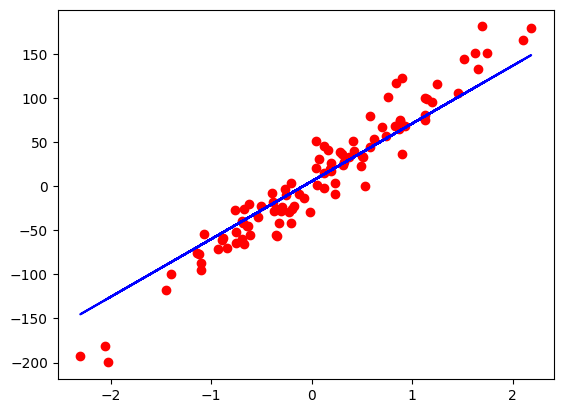

In [ ]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print(X_numpy.shape)
print(y_numpy.shape)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward
    loss.backward()

    # update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()